In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys

In [3]:
os.chdir("..")
sys.path.append("src")
sys.path.append("data")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [4]:
from data_pipeline import load_data, clean_category, load_and_clean_data, add_dummy_popularity, apply_custom_scoring, compute_tfidf_matrix, recommend_destinations, plot_recommendations
from evaluation import get_top_recommendations
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
df = load_data('data/travel_destinations.csv')

In [6]:
df.head()

,City,Country,Category,Best_Time_to_Travel
0,London,United Kingdom,"history, culture, museums, theatre, shopping, ...","Apr, May, Jun, Sep, Oct"
1,Paris,France,"art, museums, landmarks, culture, history, foo...","Apr, May, Jun, Sep, Oct"
2,Rome,Italy,"history, ancient ruins, culture, art, food, re...","Apr, May, Jun, Sep, Oct"
3,Berlin,Germany,"history, culture, nightlife, art, museums, music","May, Jun, Jul, Aug, Sep"
4,Madrid,Spain,"art, museums, nightlife, food, culture, histor...","Apr, May, Jun, Sep, Oct"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 111 non-null    object
 1   Country              111 non-null    object
 2   Category             111 non-null    object
 3   Best_Time_to_Travel  111 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB


In [8]:
df['Category'] = df['Category'].apply(clean_category)

In [9]:
df = load_and_clean_data(df)

In [10]:
df = add_dummy_popularity(df)

In [11]:
tfidf_matrix, tfidf = compute_tfidf_matrix(df)

In [12]:
user_input = "culture, museums, history"
recommendations = recommend_destinations(user_input, tfidf_matrix, tfidf, df)

In [13]:
scored = apply_custom_scoring(recommendations, {'similarity': 0.8, 'popularity': 0.2})

In [14]:
print(scored[['City', 'Country', 'similarity_score', 'final_score']].head())

         City      Country  similarity_score  final_score
3      Berlin      Germany          0.576578     0.655808
4      Madrid        Spain          0.568869     0.647823
6   Amsterdam  Netherlands          0.476853     0.570573
1       Paris       France          0.409475     0.525762
14  Stockholm       Sweden          0.401297     0.495583


In [15]:
# Step 1: User input
user_input = "culture, museums, history"

# Step 2: Transform user input to vector
user_vector = tfidf.transform([user_input])

# Step 3: Get top recommendations using cosine similarity directly
top_indices, top_scores = get_top_recommendations(tfidf_matrix, user_vector, top_n=5)

# Step 4: Fetch and display top destinations
top_destinations = df.iloc[top_indices].copy()
top_destinations['similarity_score'] = top_scores

# Optional: Apply scoring, popularity, etc. here
print(top_destinations[['City', 'Country', 'similarity_score']])


         City      Country  similarity_score
3      Berlin      Germany          0.576578
4      Madrid        Spain          0.568869
6   Amsterdam  Netherlands          0.476853
1       Paris       France          0.409475
14  Stockholm       Sweden          0.401297


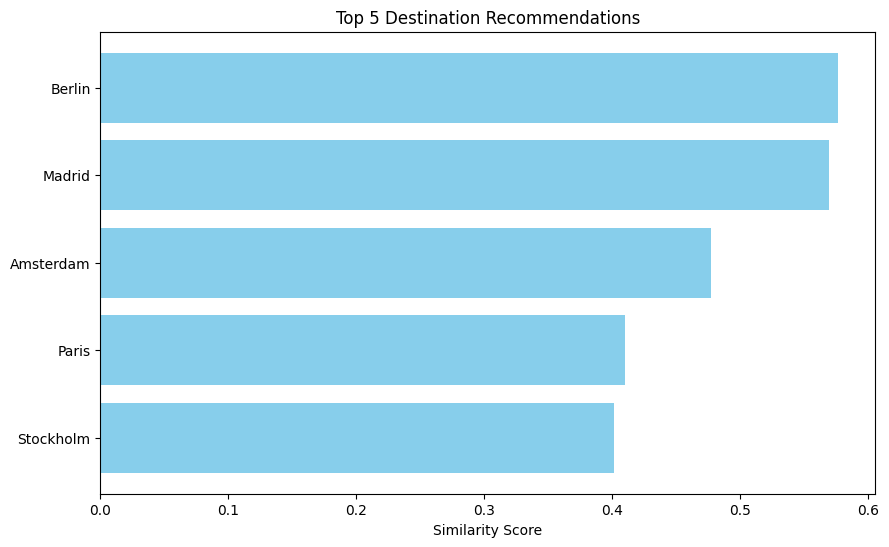

In [16]:
plot_recommendations(scored)